# A Fuzzy Logic-based Control System for Microwave Ovens!

### Importing the required libraries!

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Input [Antecedent] and output [Consequent] for the Rule Base!

In [2]:
Type_of_food     = ctrl.Antecedent(np.arange(0,101,1),'Type Of Food')
Quantity_Of_food = ctrl.Antecedent(np.arange(0,101,1),'Quantity Of Food')
Cooking_time     = ctrl.Consequent(np.arange(0,61,1),'Cooking Time')

### User defined membership functions!

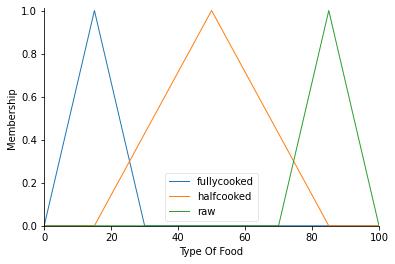

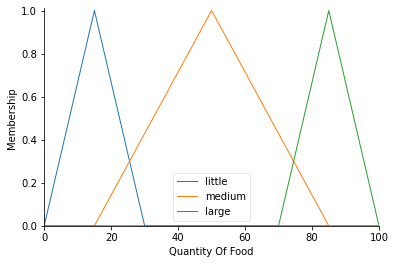

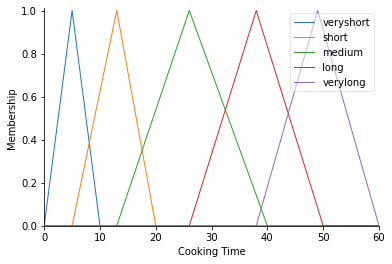

In [3]:
Type_of_food['fullycooked'] =fuzz.trimf(Type_of_food.universe,[0,15,30])
Type_of_food['halfcooked']  =fuzz.trimf(Type_of_food.universe,[15,50,85])
Type_of_food['raw']         =fuzz.trimf(Type_of_food.universe,[70,85,100])
Type_of_food.view()
print('\n')
Quantity_Of_food['little'] = fuzz.trimf(Quantity_Of_food.universe,[0,15,30])
Quantity_Of_food['medium'] = fuzz.trimf(Quantity_Of_food.universe,[15,50,85])
Quantity_Of_food['large']  = fuzz.trimf(Quantity_Of_food.universe,[70,85,100])
Quantity_Of_food.view()
print('\n')
Cooking_time['veryshort'] = fuzz.trimf(Cooking_time.universe,[0,5,10])
Cooking_time['short']     = fuzz.trimf(Cooking_time.universe,[5,13,20])
Cooking_time['medium']    = fuzz.trimf(Cooking_time.universe,[13,26,40])
Cooking_time['long']      = fuzz.trimf(Cooking_time.universe,[26,38,50])
Cooking_time['verylong']  = fuzz.trimf(Cooking_time.universe,[38,49,60])
Cooking_time.view()

### Designing of set rules for Rule Base [Knowledge base]

In [4]:
rule1 = ctrl.Rule(Type_of_food['fullycooked'] & Quantity_Of_food['little'], Cooking_time['veryshort'])
rule2 = ctrl.Rule(Type_of_food['fullycooked'] & Quantity_Of_food['medium'], Cooking_time['short'])
rule3 = ctrl.Rule(Type_of_food['fullycooked'] & Quantity_Of_food['large'],  Cooking_time['medium'])
rule4 = ctrl.Rule(Type_of_food['raw'] & Quantity_Of_food['little'], Cooking_time['medium'])
rule5 = ctrl.Rule(Type_of_food['raw'] & Quantity_Of_food['medium'], Cooking_time['long'])
rule6 = ctrl.Rule(Type_of_food['raw'] & Quantity_Of_food['large'],  Cooking_time['verylong'])
rule7 = ctrl.Rule(Type_of_food['halfcooked'] & Quantity_Of_food['little'], Cooking_time['medium'])
rule8 = ctrl.Rule(Type_of_food['halfcooked'] & Quantity_Of_food['medium'], Cooking_time['short'])
rule9 = ctrl.Rule(Type_of_food['halfcooked'] & Quantity_Of_food['large'],  Cooking_time['long'])

### Designing of Fuzzy Inference System for the above mentioned 9 Rules

In [5]:
Cooking_time_controller=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
css=ctrl.ControlSystemSimulation(Cooking_time_controller)

### Compute the Cooking Time at Type of Food = 50 and Quantity of Food = 50!

In [11]:
css.input['Type Of Food']     = int(input("Enter Type Of Food[0 to 100]    : ",))
css.input['Quantity Of Food'] = int(input("Enter Quantity Of Food[0 to 100]: ",))
css.compute()

Enter Type Of Food[0 to 100]    : 50
Enter Quantity Of Food[0 to 100]: 50


In [12]:
print("Required Cooking Time : ",css.output['Cooking Time'])

Required Cooking Time :  12.666666666666666


### Output Plot

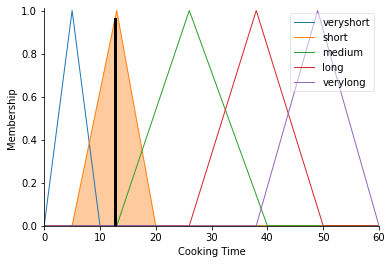

In [13]:
Cooking_time.view(sim=css)